# 两根史诗级K线：检验100年来那些“交易天才” . 第4讲

## 本段代码展示了利用Numpy生成正态分布随机收益率序列，模拟股票K线的过程

# 1. 环境设置

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 每年交易日个数
DAYS_PER_YEAR = 242
# 每天5分钟线个数
PERIODS_PER_DAY = 240 / 5
# 转换为百分比所需倍数
TO_PERCENT = 100.0

# 2. 分钟线模拟生成函数

In [3]:
def get_price_5m(annu_ret, annu_vol, n=DAYS_PER_YEAR):
    """Return price array of freq = 5Min"""
    ratio = DAYS_PER_YEAR * PERIODS_PER_DAY
    vol_5m = annu_vol *1. / np.sqrt(ratio)
    alpha_5m = annu_ret *1. / (ratio)
    
    ret = np.random.randn(n * PERIODS_PER_DAY) * vol_5m + alpha_5m
    price = np.cumprod(1+ret)
    return price

In [4]:
def get_ohlc(arr, t):
    """
    Get OHLC price from array of price 'arr'.
    
    """
    return t, arr[0], arr.max(), arr.min(), arr[-1]

def get_quotes(price_arr, sub_length):
    """
    Construt OHLC price of each period of length 'sub_length' from 'price_arr'
    
    """
    quotes = []
    for i in range(0, len(price_arr), sub_length):
        sub_arr = price_arr[i: i + sub_length]
        quote = get_ohlc(sub_arr, i // sub_length)
        quotes.append(quote)
    return quotes

# 3. 作图

In [5]:
from matplotlib.finance import candlestick_ohlc

/home/bliu/pytrade_dir/venv_pytrade/local/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


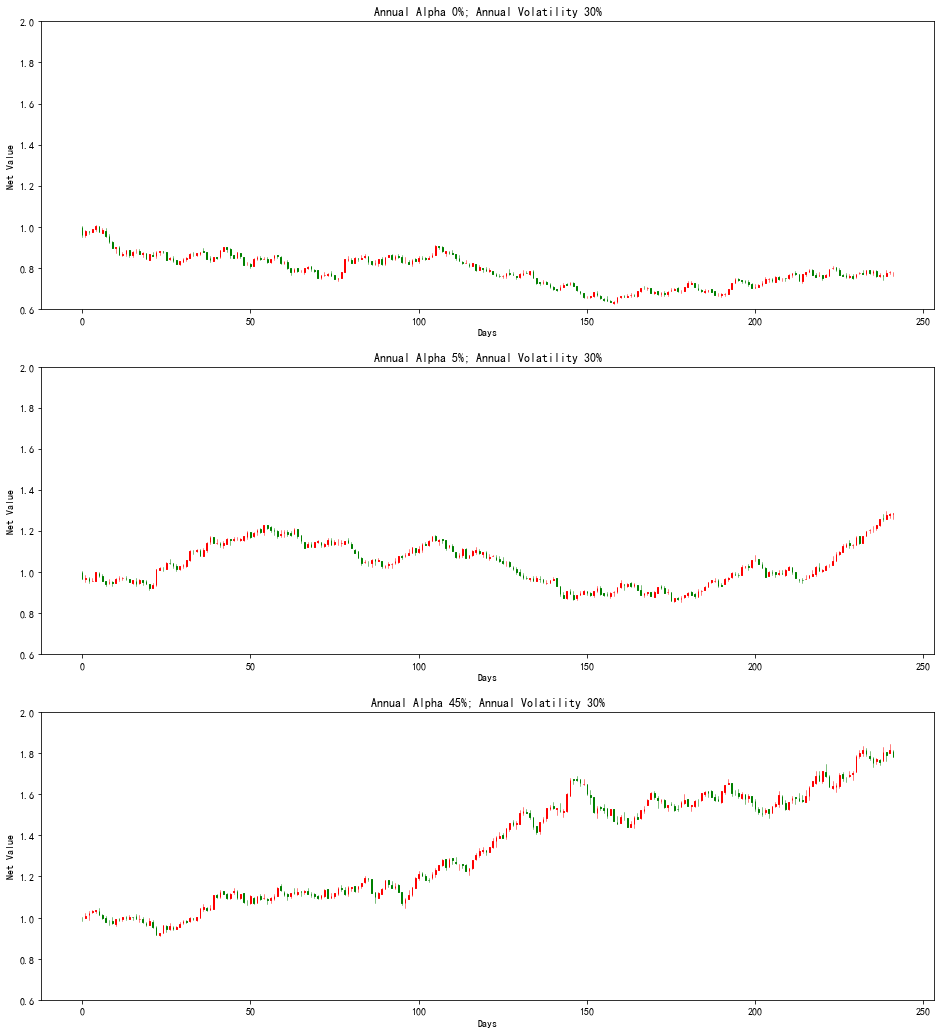

In [8]:
# 指定不同K线的年化收益率与年化波动率
alpha_vol_list = [
    {'alpha': 0.0 , 'volatility': 0.30},
    {'alpha': 0.05, 'volatility': 0.30},
    {'alpha': 0.45, 'volatility': 0.30},
]
n_subfigures = len(alpha_vol_list)
n_days = 242  # 要画多少个交易日的K线

fig, axes = plt.subplots(n_subfigures, 1, figsize=(16, 6 * n_subfigures))

for i in range(n_subfigures):
    alpha = alpha_vol_list[i]['alpha']
    vol = alpha_vol_list[i]['volatility']
    ax = axes[i]
    
    price_5m = get_price_5m(alpha, vol, n_days)  # 计算价格序列
    quotes = get_quotes(price_5m, sub_length=PERIODS_PER_DAY)  # 计算quote序列
    
    candlestick_ohlc(ax=ax, quotes=quotes, colorup='red', colordown='green')  # 做蜡烛图
    
    ax.set(xlabel='Days', ylabel='Net Value',  # 横轴纵轴名
           ylim=(0.6, 2.0),                    # 纵轴范围
           title='Annual Alpha {:.0f}%; Annual Volatility {:.0f}%'.format(alpha*TO_PERCENT, vol*TO_PERCENT))
plt.show()